# UBC Scientific Software Seminar

## February 3, 2017

1. How to train an neural network
    * Layers, weights and biases
    * Training data and a cost function
    * Stochastic gradient descent and backpropagation
    * L2 regularization
2. A bad example of gradient descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. How to train a neural network

### Layers, weights and biases

A neural network is a composition of functions where the output from layer $\ell - 1$ is called the activation $a^{(\ell - 1)}$ and is the input into layer $\ell$:

$$
a^{(\ell)} = \sigma\left( W^{(\ell)} a^{(\ell - 1)} + b^{(\ell)} \right)
$$

The first layer is the input $x = a^{(0)}$ and the output of the newtork is output of the final layer $a^{(L)}$. The function depends on the weight matrices $W^{(\ell)}$ and bias vectors $b^{(\ell)}$ and we denote the function as

$$
F(x; W,b) = \sigma\left( W^{(\ell)} a^{(\ell - 1)} + b^{(\ell)} \right) = \sigma\left( W^{(\ell)} \sigma\left( W^{(\ell - 1)} a^{(\ell - 2)} + b^{(\ell - 1)} \right) + b^{(\ell)} \right) = \cdots
$$

### Training data and a cost function

Given a set of $N$ samples $\{ x_i \}_{i=1}^N$ (where each $x_i \in \mathbb{R}^m$ in the feature space represents an image, text, numerical measurement, etc. depending on the problem at hand) with corresponding target data $\{ y_i \}_{i=1}^N$, we can compute the error of the neural network as a function of the weights and biases as a weighted sum of the error on each training sample:

$$
C(W,b) = \frac{1}{N} \sum_{i=1}^N C_{x_i}(W,b)
$$

where $C_{x_i}$ is the error for each sample $x_i$. The obvious choice for the cost function is the sum of squared errors:

$$
C(W,b) = \frac{1}{N} \sum_{i=1}^N C_{x_i}(W,b) = \frac{1}{N} \sum_{i=1}^N ||y_i - F(x_i; W,b) ||^2
$$

however it's the cross entropy function that's used in practice:

$$
C(W,b) = \frac{1}{N} \sum_x \sum_j \left( y_j \ln a^{(L)}_j + (1 − y_j) \ln(1−a_j^{(L)})\right)
$$

### Gradient descent

The goal is to find values for the weights and biases to minimize the given cost function. The idea is to apply gradient descent:

1. Pick initial values for the weights $\{ W^{(\ell)}_{i,j} \}$ and biases $\{ b^{(\ell)}_j\}$
2. Compute the values of the partial derivatives of the cost function (ie. the gradient of $C$) for these weights and biases:
$$
\nabla C = \left( \frac{\partial C}{\partial W^{(\ell)}_{i,j}}, \frac{\partial C}{\partial b^{(\ell)}_j} \right) \\
$$

3. Update the parameters by a multiple $\epsilon$ (called the learning rate) of the gradient:
$$
(W,b) = (W,b) - \epsilon \nabla C \\
$$
4. Repeat 2 and 3 until the stopping criteria is reach (ie. $||\nabla C|| < \delta$)

### Stochastic gradient descent and backpropagation

There are a few obstacles to the straightforward gradient descent alorithm.

First, if there are a lot of training examples, then computing the gradient of the cost function can be expensive. Instead, stochastic gradient desecnt takes a random sample of training examples to compute the gradient of the cost function and then updates the parameters and continues with another random sample.

Second, the nature of the function as a composition of many functions complicates the formula for the partial derivatives of the cost function. Backpropagation is a clever, efficient algorithm to compute the gradient.

### L2 regularization

One more tool to improve the training of a neural network is to assign a cost to large parameters so that the weights are not too big. This is done with adding the L2 norm of the weights which is simply the sum of squares of all the weights in all the layers:
$$
C(W,b) = \frac{1}{N} \sum_{i=1}^N ||y_i - F(x_i; W,b) ||^2 + \alpha ||W||^2_2
$$
where
$$
||W||^2_2 = \sum_{i,j} W_{i,j}^2 
$$
The parameter alpha is set by the user and is tuned to the training data.

## 2. A bad example of gradient descent

Let's generate some fake data and naively implement gradient descent model the data!  

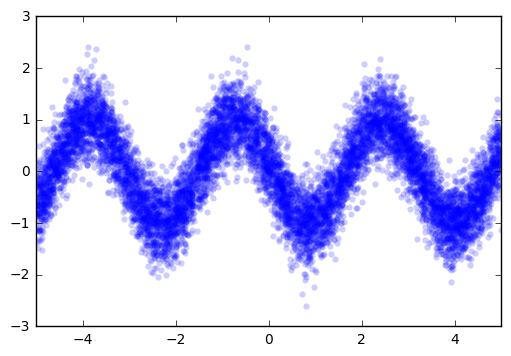

In [2]:
N = 10000
param = [2,3]
x = np.random.rand(N)*10 - 5
noise = np.random.randn(N)*0.4
y = np.sin(param[0]*x + param[1]) + noise
plt.scatter(x,y,lw=0,alpha=0.2), plt.xlim([-5,5]);

The model we want to fit to the data is

$$
F(x; a,b) = \sin(ax + b)
$$

and we define the cost function

$$
C = \frac{1}{2N} \sum_{i=1}^N (y_i - F(x_i; a,b))^2
$$

The gradient of the cost function with respect to the model parameters $a$ and $b$:

$$
\begin{align*}
\frac{\partial C}{\partial a} &= -\frac{1}{N} \sum_{i=1}^N (y_i - F(x_i; a,b)) \frac{\partial F(x_i; a,b)}{\partial a} = -\frac{1}{N} \sum_{i=1}^N (y_i - \sin(ax_i + b)) \cos(ax_i + b) x_i \\
\frac{\partial C}{\partial b} &= -\frac{1}{N} \sum_{i=1}^N (y_i - F(x_i; a,b)) \frac{\partial F(x_i; a,b)}{\partial b} = -\frac{1}{N} \sum_{i=1}^N (y_i - \sin(ax_i + b)) \cos(ax_i + b) \\
\end{align*}
$$

Gradient descent is then the process of updating parameters $(a_i,b_i)$ using the gradient:

$$
(a_{i+1},b_{i+1}) = (a_i,b_i) - \epsilon \nabla C(a_i,b_i)
$$

In [3]:
def train(x,y,p0,learning_rate=0.01,delta=0.001,max_iter=1000):

    params = np.array(p0) # Initial guess for the parameters as NumPy array
    n_iter = 0 # Initialize counter
    steps = np.array(params) # Record the current parameters
    grad = np.array([100,100]) # Initialize gradient vector (something with a large norm to get the loop started)
    
    while np.linalg.norm(grad) > delta and n_iter < max_iter:
        # Get the current values for the parameters
        a = params[0]
        b = params[1]
        
        # Compute the gradient with given parameters
        dCda = (-1/N)*np.sum( (y - np.sin(a*x + b))*np.cos(a*x + b)*x )
        dCdb = (-1/N)*np.sum( (y - np.sin(a*x + b))*np.cos(a*x + b) )
        grad = np.array([dCda,dCdb])
        
        # Update the parameters
        params = params - learning_rate * grad
        
        # Record the parameters in the step array and update the number of iterations
        steps = np.vstack([steps,params])
        n_iter = n_iter + 1
    
    if n_iter == max_iter:
        print('Stopping... reached maximum iterations.')
        
    return params, steps

Let's train our model starting at $a = 1$ and $b=2.5$.

In [4]:
params, steps = train(x,y,[1,2.5],max_iter=2000)

Let's plot the steps to see where gradient descent takes the parameters...

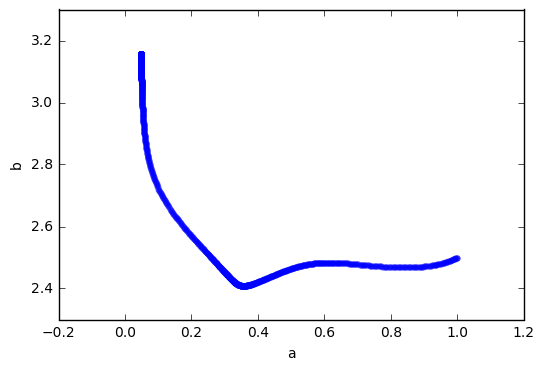

In [5]:
plt.scatter(steps[:,0],steps[:,1],lw=0,alpha=0.5)
plt.xlabel('a'), plt.ylabel('b');

Gradient descent goes off course! Let's train our model starting at $a=1.5$ and $b=2.5$.

In [6]:
params, steps = train(x,y,[1.5,2.5],max_iter=2000)

Let's plot the steps to see where gradient descent takes the parameters...

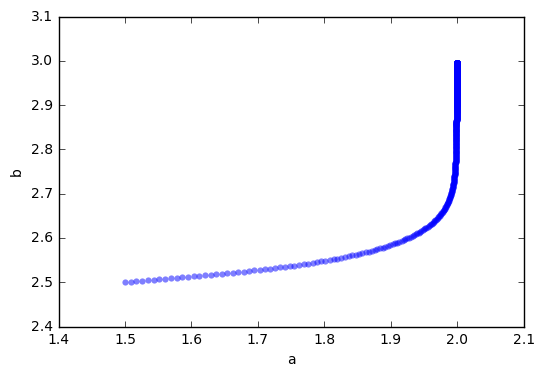

In [7]:
plt.scatter(steps[:,0],steps[:,1],lw=0,alpha=0.5)
plt.xlabel('a'), plt.ylabel('b');

Much better! Let's plot our model against the training data:

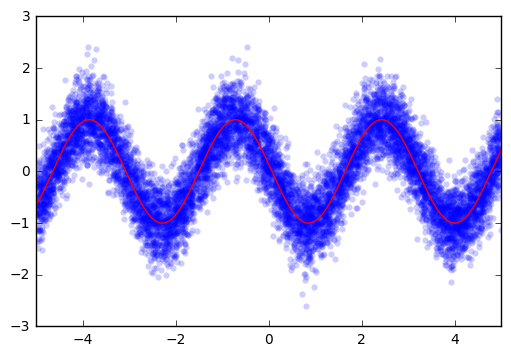

In [8]:
x_test = np.linspace(-5,5,1000)
y_test = np.sin(params[0]*x_test + params[1])
plt.plot(x_test,y_test,'r')
plt.scatter(x,y,lw=0,alpha=0.2), plt.xlim([-5,5]);